In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
from sklearn.datasets import fetch_california_housing

ch = fetch_california_housing()
print(ch.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [4]:
cdf = pd.DataFrame(data=ch.data, columns=ch.feature_names)

In [5]:
cdf['price'] = ch.target

In [6]:
cdf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
cdf.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
cdf.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

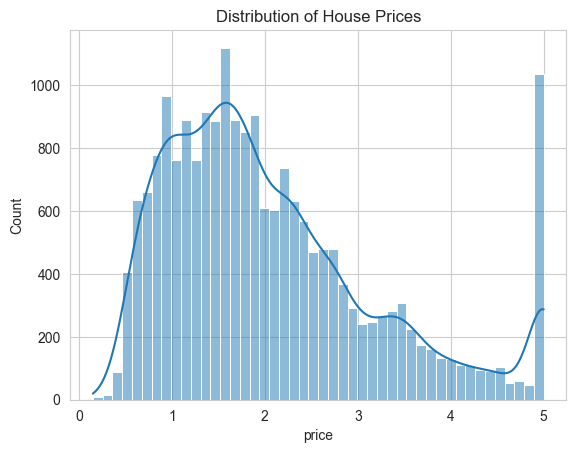

In [10]:
sns.histplot(cdf['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

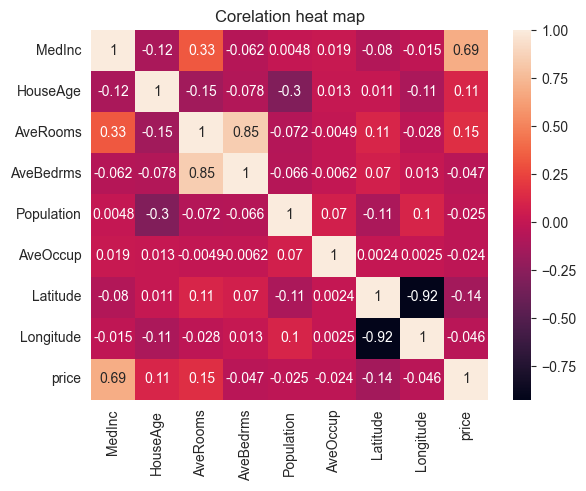

In [11]:
numeric_cdf = cdf.select_dtypes(include=[np.number])
sns.heatmap(numeric_cdf.corr(),annot=True)
plt.title("Corelation heat map")
plt.show()

In [12]:
cdf.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [13]:
X = cdf[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
Y = cdf['price']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(x_train,y_train)
predictions = Model.predict(x_val)

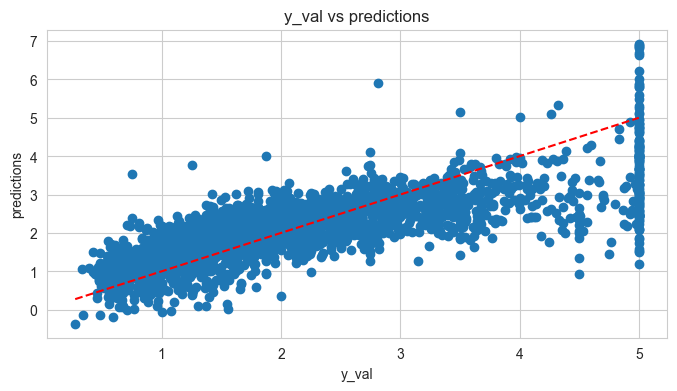

In [16]:
plt.figure(figsize=(8, 4))
plt.scatter(y_val, predictions)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],color='red', linestyle='--')
plt.title("y_val vs predictions")
plt.xlabel("y_val")
plt.ylabel("predictions")
plt.show()

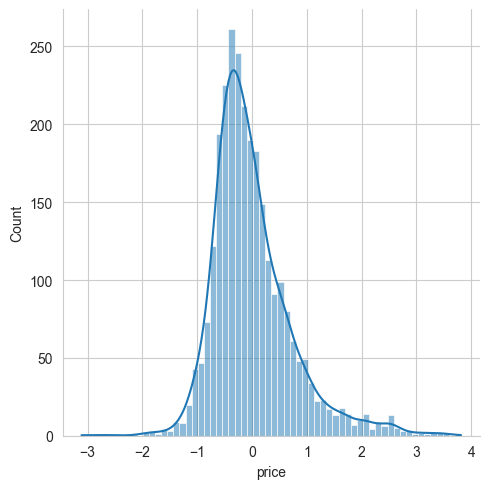

<Figure size 1600x1400 with 0 Axes>

In [17]:
sns.displot((y_val-predictions),kde=True)
plt.figure(figsize=(16,14))
plt.show()

In [18]:
from sklearn import metrics

In [19]:
print('MAE:',metrics.mean_absolute_error(y_val,predictions))
print('MSE',metrics.mean_squared_error(y_val,predictions))
print('RMS',metrics.root_mean_squared_error(y_val,predictions))

MAE: 0.5350538845226663
MSE 0.5362796165976689
RMS 0.7323111473941039


In [20]:
prediction2 = Model.predict(x_test)

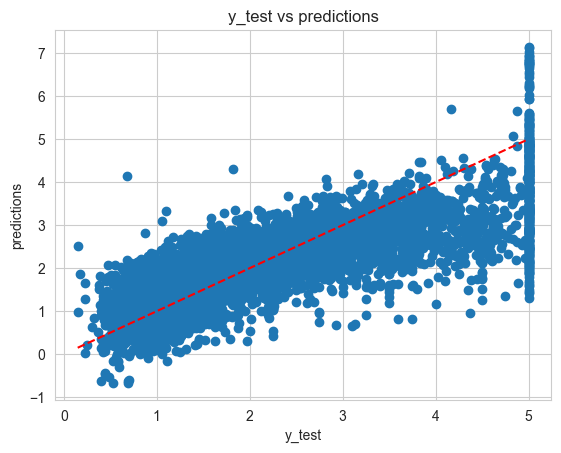

In [21]:
plt.scatter(y_test, prediction2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', linestyle='--')
plt.title("y_test vs predictions")
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

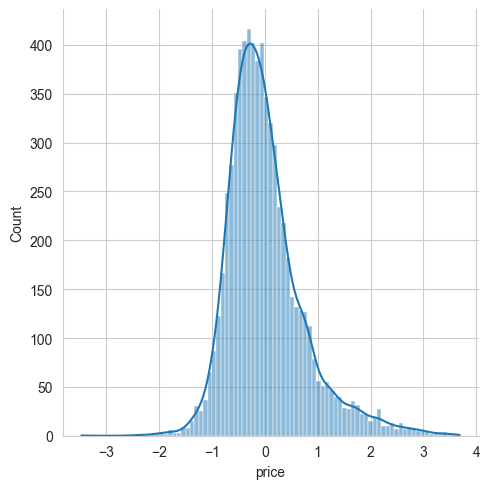

In [22]:
sns.displot(y_test-prediction2,kde=True)

In [23]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction2))
print('MSE',metrics.mean_squared_error(y_test,prediction2))
print('RMS',metrics.root_mean_squared_error(y_test,prediction2))

MAE: 0.5344782797736226
MSE 0.5322213954572488
RMS 0.7295350543032519


In [24]:
df = pd.DataFrame(Model.coef_,X.columns,columns=["Coefficients"])
print(df)

            Coefficients
MedInc          0.431340
HouseAge        0.009655
AveRooms       -0.096560
AveBedrms       0.558126
Population     -0.000009
AveOccup       -0.002955
Latitude       -0.418625
Longitude      -0.429426
